=== SVM Klasifikasi - Iris Dataset ===
Akurasi Linear SVM pada Iris: 0.960

=== SVM Klasifikasi - Moons Dataset ===
Akurasi Polynomial SVM: 0.900
Akurasi Polynomial Kernel SVM: 0.900
Akurasi RBF Kernel SVM: 0.300

=== SVM Regresi ===
MSE Linear SVR: 0.746


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


MSE Polynomial SVR: 0.726

=== Membuat Visualisasi ===


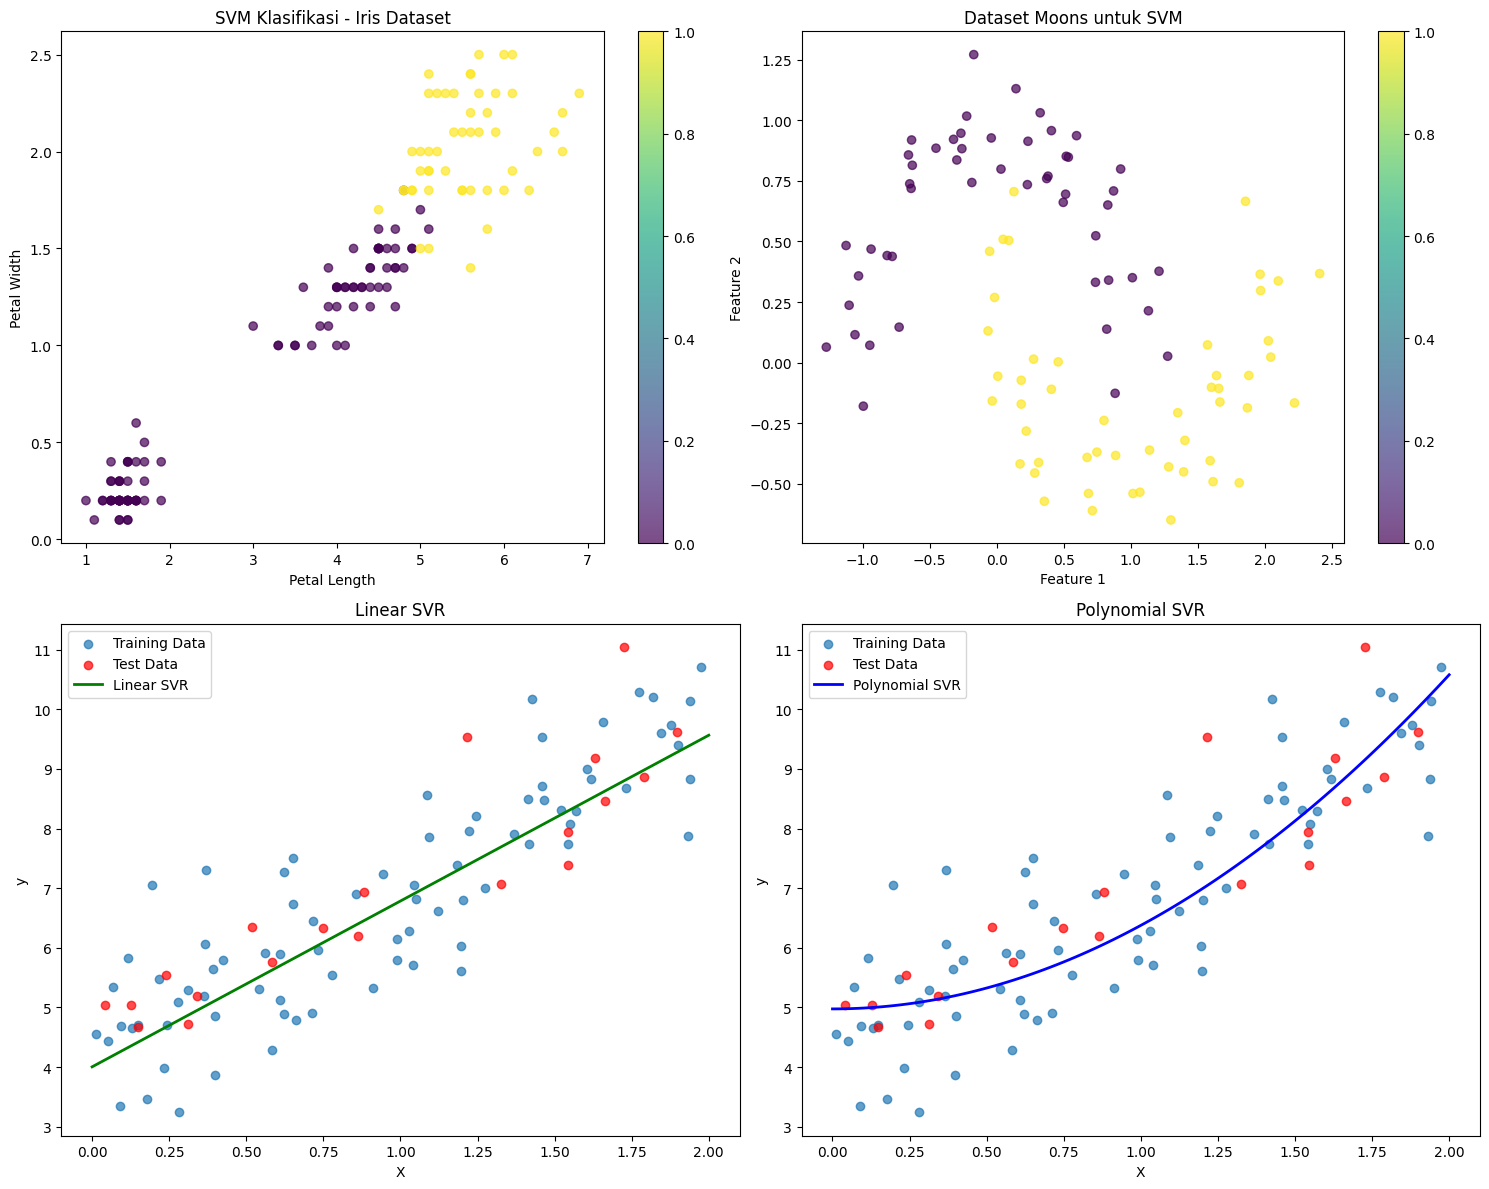


=== Ringkasan Performa ===
KLASIFIKASI:
  - Linear SVM (Iris): 0.960
  - Polynomial Features SVM (Moons): 0.900
  - Polynomial Kernel SVM (Moons): 0.900
  - RBF Kernel SVM (Moons): 0.300

REGRESI:
  - Linear SVR MSE: 0.746
  - Polynomial SVR MSE: 0.726


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# =============================================================================
# 1. SVM KLASIFIKASI - IRIS DATASET
# =============================================================================
print("=== SVM Klasifikasi - Iris Dataset ===")

# Load iris dataset
iris = datasets.load_iris()
X_iris = iris["data"][:, (2, 3)]  # petal length, petal width
y_iris = (iris["target"] == 2).astype(np.float64)  # Iris virginica

# Linear SVM Classifier
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
])

# Train the model
svm_clf.fit(X_iris, y_iris)

# Make predictions
y_pred_iris = svm_clf.predict(X_iris)
accuracy_iris = accuracy_score(y_iris, y_pred_iris)
print(f"Akurasi Linear SVM pada Iris: {accuracy_iris:.3f}")

# =============================================================================
# 2. SVM KLASIFIKASI - MOONS DATASET
# =============================================================================
print("\n=== SVM Klasifikasi - Moons Dataset ===")

# Generate moons dataset
X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

# 1. Polynomial Features SVM
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

polynomial_svm_clf.fit(X_train, y_train)
y_pred_poly = polynomial_svm_clf.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Akurasi Polynomial SVM: {accuracy_poly:.3f}")

# 2. Polynomial Kernel SVM
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5, random_state=42))
])

poly_kernel_svm_clf.fit(X_train, y_train)
y_pred_poly_kernel = poly_kernel_svm_clf.predict(X_test)
accuracy_poly_kernel = accuracy_score(y_test, y_pred_poly_kernel)
print(f"Akurasi Polynomial Kernel SVM: {accuracy_poly_kernel:.3f}")

# 3. RBF Kernel SVM
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001, random_state=42))
])

rbf_kernel_svm_clf.fit(X_train, y_train)
y_pred_rbf = rbf_kernel_svm_clf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Akurasi RBF Kernel SVM: {accuracy_rbf:.3f}")

# =============================================================================
# 3. SVM REGRESI
# =============================================================================
print("\n=== SVM Regresi ===")

# Generate regression data
np.random.seed(42)
X_reg = 2 * np.random.rand(100, 1)
y_reg = 4 + 3 * X_reg[:, 0] + np.random.randn(100)

# Split regression data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# 1. Linear SVR
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train_reg, y_train_reg)
y_pred_linear_reg = svm_reg.predict(X_test_reg)
mse_linear = mean_squared_error(y_test_reg, y_pred_linear_reg)
print(f"MSE Linear SVR: {mse_linear:.3f}")

# 2. Polynomial SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X_train_reg, y_train_reg)
y_pred_poly_reg = svm_poly_reg.predict(X_test_reg)
mse_poly = mean_squared_error(y_test_reg, y_pred_poly_reg)
print(f"MSE Polynomial SVR: {mse_poly:.3f}")

# =============================================================================
# 4. VISUALISASI
# =============================================================================
print("\n=== Membuat Visualisasi ===")

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Iris dataset
ax1 = axes[0, 0]
scatter = ax1.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis', alpha=0.7)
ax1.set_title('SVM Klasifikasi - Iris Dataset')
ax1.set_xlabel('Petal Length')
ax1.set_ylabel('Petal Width')
plt.colorbar(scatter, ax=ax1)

# Plot 2: Moons dataset
ax2 = axes[0, 1]
scatter2 = ax2.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', alpha=0.7)
ax2.set_title('Dataset Moons untuk SVM')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
plt.colorbar(scatter2, ax=ax2)

# Plot 3: Linear Regression
ax3 = axes[1, 0]
ax3.scatter(X_train_reg, y_train_reg, alpha=0.7, label='Training Data')
ax3.scatter(X_test_reg, y_test_reg, alpha=0.7, color='red', label='Test Data')
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
y_plot = svm_reg.predict(X_plot)
ax3.plot(X_plot, y_plot, 'g-', linewidth=2, label='Linear SVR')
ax3.set_title('Linear SVR')
ax3.set_xlabel('X')
ax3.set_ylabel('y')
ax3.legend()

# Plot 4: Polynomial Regression
ax4 = axes[1, 1]
ax4.scatter(X_train_reg, y_train_reg, alpha=0.7, label='Training Data')
ax4.scatter(X_test_reg, y_test_reg, alpha=0.7, color='red', label='Test Data')
y_plot_poly = svm_poly_reg.predict(X_plot)
ax4.plot(X_plot, y_plot_poly, 'b-', linewidth=2, label='Polynomial SVR')
ax4.set_title('Polynomial SVR')
ax4.set_xlabel('X')
ax4.set_ylabel('y')
ax4.legend()

plt.tight_layout()
plt.show()

# =============================================================================
# 5. RINGKASAN PERFORMA
# =============================================================================
print("\n=== Ringkasan Performa ===")
print("KLASIFIKASI:")
print(f"  - Linear SVM (Iris): {accuracy_iris:.3f}")
print(f"  - Polynomial Features SVM (Moons): {accuracy_poly:.3f}")
print(f"  - Polynomial Kernel SVM (Moons): {accuracy_poly_kernel:.3f}")
print(f"  - RBF Kernel SVM (Moons): {accuracy_rbf:.3f}")
print("\nREGRESI:")
print(f"  - Linear SVR MSE: {mse_linear:.3f}")
print(f"  - Polynomial SVR MSE: {mse_poly:.3f}")